<a href="https://colab.research.google.com/github/jay0x5/About-Me-Website/blob/main/Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [61]:
company = 'AAPL'

start = dt.datetime(2012,1,1)
end = dt.datetime(2023,1,1)

#broken Yahoo api
# data = web.DataReader(company,'yahoo',start,end)
# print(data)

data = pd.read_csv("/content/AAPL1.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [115]:
#Build a model
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of the next closing

model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50,batch_size=32)

#Save the model
model.save("./models/Model.h5")
print("model saved...")

Epoch 1/50
85/85 [==============================] - 14s 97ms/step - loss: 0.0082
Epoch 2/50
85/85 [==============================] - 8s 95ms/step - loss: 0.0023
Epoch 3/50
85/85 [==============================] - 8s 95ms/step - loss: 0.0018
Epoch 4/50
85/85 [==============================] - 8s 97ms/step - loss: 0.0017
Epoch 5/50
85/85 [==============================] - 8s 98ms/step - loss: 0.0023
Epoch 6/50
85/85 [==============================] - 8s 95ms/step - loss: 0.0016
Epoch 7/50
85/85 [==============================] - 8s 96ms/step - loss: 0.0015
Epoch 8/50
85/85 [==============================] - 8s 95ms/step - loss: 0.0015
Epoch 9/50
85/85 [==============================] - 8s 94ms/step - loss: 0.0014
Epoch 10/50
85/85 [==============================] - 8s 94ms/step - loss: 0.0016
Epoch 11/50
85/85 [==============================] - 8s 94ms/step - loss: 0.0013
Epoch 12/50
85/85 [==============================] - 8s 97ms/step - loss: 0.0013
Epoch 13/50
85/85 [=================

In [120]:
#test the accuracy on existing test
test_start = dt.datetime(2023,2,2)
test_end = dt.datetime.now()

test_data = pd.read_csv('/content/testold.csv')
actual_prices = test_data['Close'].values


In [121]:
total_dataset = pd.concat((data["Close"], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

1/1 [==============================] - 0s 37ms/step


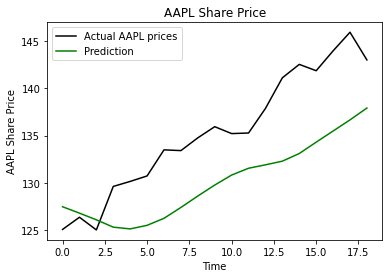

Actual 125.06999969482422 - Predicted [127.47154]
Actual 126.36000061035156 - Predicted [126.7959]
Actual 125.0199966430664 - Predicted [126.087524]
Actual 129.6199951171875 - Predicted [125.31223]
Actual 130.14999389648438 - Predicted [125.12738]
Actual 130.72999572753906 - Predicted [125.505356]
Actual 133.49000549316406 - Predicted [126.24827]
Actual 133.41000366210938 - Predicted [127.3963]
Actual 134.75999450683594 - Predicted [128.6054]
Actual 135.94000244140625 - Predicted [129.7645]
Actual 135.2100067138672 - Predicted [130.82314]
Actual 135.27000427246094 - Predicted [131.54411]
Actual 137.8699951171875 - Predicted [131.9043]
Actual 141.11000061035156 - Predicted [132.2926]
Actual 142.52999877929688 - Predicted [133.1027]
Actual 141.86000061035156 - Predicted [134.3034]
Actual 143.9600067138672 - Predicted [135.47917]
Actual 145.92999267578125 - Predicted [136.66011]
Actual 143.0 - Predicted [137.91072]


In [122]:
#make predictions
x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0 ])


x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plot
plt.plot(actual_prices, color="black",label=f"Actual {company} prices")
plt.plot(predicted_prices,color="green",label="Prediction")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

for j in range(len(actual_prices)):
  print(f"Actual {actual_prices[j]} - Predicted {predicted_prices[j]}")

In [123]:
#Predict the next day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))


prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Predicted Price for Tomorrow: {prediction}")

1/1 [==============================] - 0s 30ms/step
Predicted Price for Tomorrow: [[138.64172]]
